# ECE/CS 434 | MP1: Visualizing Data
<br />
<nav>
    <span class="alert alert-block alert-warning">Due on Monday Feb 10th 11:59PM on Gradescope</span> 
</nav><br> 

 

## Objective
The goal of this MP is for you to become familiar with sensor data collected from mobile phones. We will work with accelerometer data, microphone recordings and Wi-Fi RSSI. The data provided to you will be relevant to future MPs, so hopefully this will give you a head start. After completing this MP, you should be able to:
- Quickly visualize readings from various mobile phone sensors.
- Interpret various aspects of sensor data from plots.

---
## Imports & Setup
The following `code` cell, when run, imports the libraries that you will require for the coding part of this MP. The use of other standard libraries is allowed but uneeded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Accelerometer
Three sets of accelerometer data are provided to you in `accl/*.csv` files. For each file, there are three columns, representing the accelerometer readings in three local axes x, y and z (in that order) (unit: $m / s^{2}$). Please refer to [this](https://www.mathworks.com/help/simulink/supportpkg/android_ref/simulinkandroidsupportpackage_galaxytab2_accelerometer.png) for the defination of axes. The accelerometer is sampled at $100\text{ Hz}$. 

#### Exercise 1
For each set of data (CSV file), plot the accelerometer readings over time. Clearly label the x and y axes of the plot, and create a legend indicating what local axes (x, y, or z) each line in your plot corresponds to. For each set of readings, you may instead use different subplots for different accelerometer axes,  if you find that more readable.

Please enter your solution in the `code` cell below:

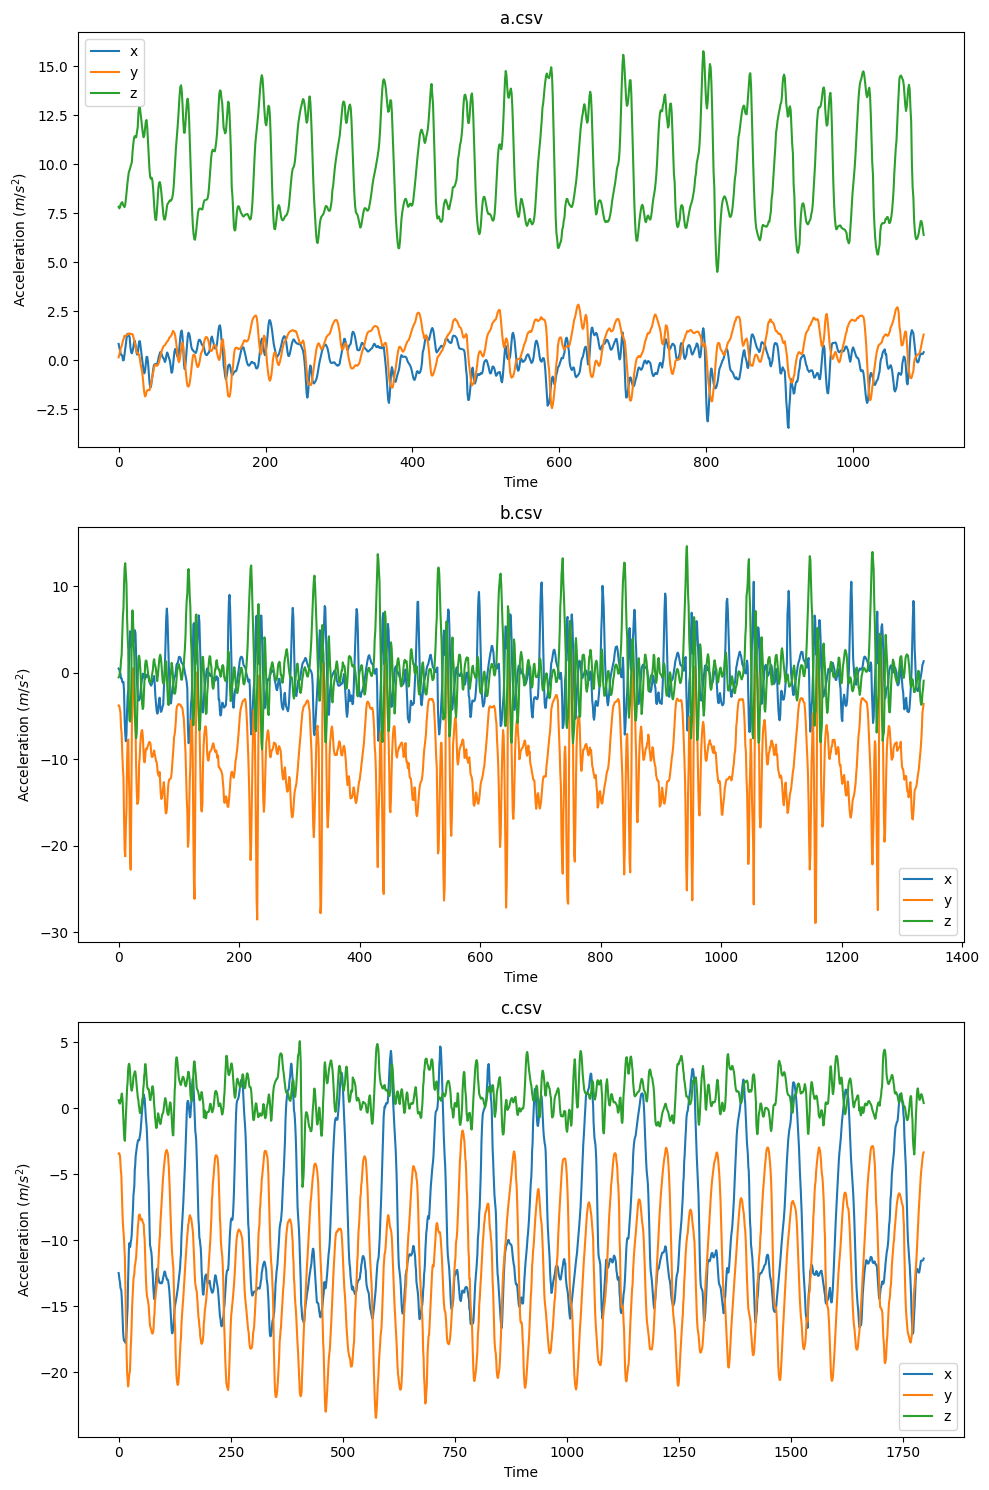

In [2]:
# Exercise 1 code here:
# read the data
folder = 'accl/'
a_data = pd.read_csv(folder+'a.csv')
b_data = pd.read_csv(folder+'b.csv')
c_data = pd.read_csv(folder+'c.csv')

# Create subplots for each dataset
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def plot_data(ax, data, title):
    ax.plot(data.index, data.iloc[:, 0], label='x')
    ax.plot(data.index, data.iloc[:, 1], label='y')
    ax.plot(data.index, data.iloc[:, 2], label='z')
    ax.set_xlabel('Time')
    ax.set_ylabel('Acceleration ($m/s^2$)')
    ax.set_title(title)
    ax.legend()
plot_data(axs[0], a_data, 'a.csv')
plot_data(axs[1], b_data, 'b.csv')
plot_data(axs[2], c_data, 'c.csv')

# Adjust layout
plt.tight_layout()
plt.show()

#### Exercise 2:
The accelerometer readings were collected under three circumstances: 
<ol type="A">
  <li>Senario A: walking with phone in pant pocket</li>
  <li>Senario B: walking with phone held in the hand statically as if the user is looking at it while walking</li>
  <li>Senario C: walking with phone in hand and the hand swinging</li>
</ol>

Carefully observe the graphs from Exercise 1 and identify which scenario each corresponds to. 

<div class="alert alert-block alert-info"><b>Hint:</b> When phone is held statically in the hand, the local y axis is relatively aligned with the walking direction. Acceleration in which direction is relatively small? When phone is in hand and the hand is swinging, the local z axis is perpendicular to your palm. Acceleration in which direction is relatively small? </div>

Please enter your answer in the `markdown` cell below: 

**Exercise 2 Answer**:
* Data `a.csv` is for: B
* Data `b.csv` is for: A
* Data `c.csv` is for: C

#### Exercise 3

For the senario B (phone held static) in the exercise above, what is the final velocity of the phone in the y direction? Assume that the initial velocity is $0$, and that the phone orientation is unchanged throughout the process.

<div class="alert alert-block alert-info"><b>Hint:</b> You will need to perform integration. </div>

Please enter your solution in the `code` cell below.

In [3]:
# Exercise 3 code here:
v_y_lower = 0
v_y_upper = 0
v_y_mid = 0
data = a_data
for i in range(1, len(data)):
    v_y_lower += data.iloc[i-1, 1] / 100
    v_y_upper += data.iloc[i, 1] / 100
    v_y_mid += ((data.iloc[i-1, 1] + data.iloc[i, 1]) / 2)/100
print("The final velocity of the phone in the y direction is: ", abs(v_y_mid), "m/s" )

The final velocity of the phone in the y direction is:  7.890741408190001 m/s


#### Exercise 4

Typical walking speed is $1.5\frac{m}{s}$. What causes the discrepancy between this expected speed and your result in Exercise 3?

Please enter your answer in the `markdown` cell below: 

**Exercise 4 Answer**: The accelaration sensor might have some bias or offset, and also the noise will be amplify when doing integration. Moreover, the sampling rate 100HZ might be too low the capature the signal. These might be possible reasons causing the discrepancy between expected speed and my result.

---
## Microphone
You are given two microphone recordings from two different microphones on the same device. In `microphone/1.csv`, the first column corresponds to samples collected by the first microphone and the second column corresponds to the second microphone. The sampling rate of the microphones are $16\text{ kHz}$. 

#### Exercise 5
Plot the microphone recordings over time. Clearly label the x and y axes, and create a legend to indicate which microphone each line corresponds to. Note that it is okay if the lines look like they overlap.

Please enter your solution in the `code` cell below.

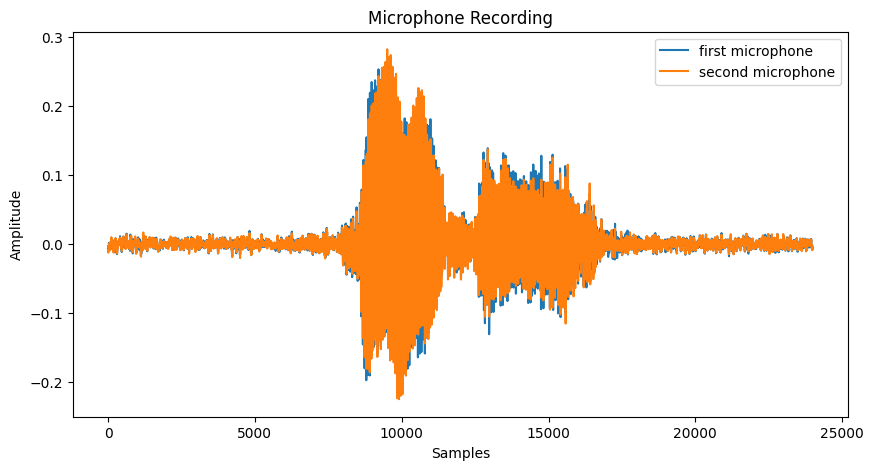

In [4]:
# Exercise 5 code here:
data_path = 'microphone/1.csv'

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
# Read the data
micro_data = pd.read_csv(data_path)
def plot_data(ax, data, title):
    ax.plot(data.index, data.iloc[:, 0], label='first microphone')
    ax.plot(data.index, data.iloc[:, 1], label='second microphone')
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    ax.legend()
plot_data(axs, micro_data, 'Microphone Recording')
plt.show()

#### Exercise 6
Zoom in to your plot from Exercise 5. How many samples does mic 1 lag behind mic 2 by? You only need to provide a rough estimate.

You may use the optional `code` cell below if you need to plot again. Please enter your answer in the `markdown` cell below: 

In [5]:
# (Optional) Exercise 6 code here:
import numpy as np
import pandas as pd

mic1 = micro_data.iloc[:,0].to_numpy()
mic2 = micro_data.iloc[:,1].to_numpy()
# Calculate the cross-correlation
correlation = np.correlate(mic1, mic2, mode='full')
# Find the lag at the peak correlation
lag = np.argmax(correlation)-len(mic2)+1
print("The lag at the peak correlation is: ", lag)

print("original correfficient: ", np.corrcoef(mic1, mic2)[0][1])
# Shift the second microphone data by the lag
mic2_shifted = np.roll(mic2, lag)
print("shifted correfficient: ", np.corrcoef(mic1, mic2_shifted)[0][1])
print(mic2[:5])
print(mic2_shifted[:5])
print("Mic 1 lags behind Mic 2 by approximately", lag, "samples.")

The lag at the peak correlation is:  -1
original correfficient:  0.9211000429859172
shifted correfficient:  0.9641648485858537
[-0.0087891 -0.010544  -0.011673  -0.012405  -0.011871 ]
[-0.010544 -0.011673 -0.012405 -0.011871 -0.010941]
Mic 1 lags behind Mic 2 by approximately -1 samples.


**Exercise 6 Answer**: Mic 1 lags behind Mic 2 by -1 samples.

---
## Wi-Fi
Wi-Fi RSSI (Received Signal Strength Indicator) is a measurement of how well your device can receive signals from a given access point or router. A user walks around a room that has 3 Wi-Fi access points. You are given the RSSI reading from their smartphone in this format: $(\text{SSID}, \text{HH:MM:SS}, \text{RSSI})$. SSID (Service Set Identifier) is a unique identifier that distinguishes between access points.

#### Exercise 7
For every unique access point, plot the RSSI over time. Clearly label the x and y axes, and create a legend to indicate which access point each line corresponds to. You may create separate graphs if you think that is more readable.

Please enter your solution in the `code` cell below.

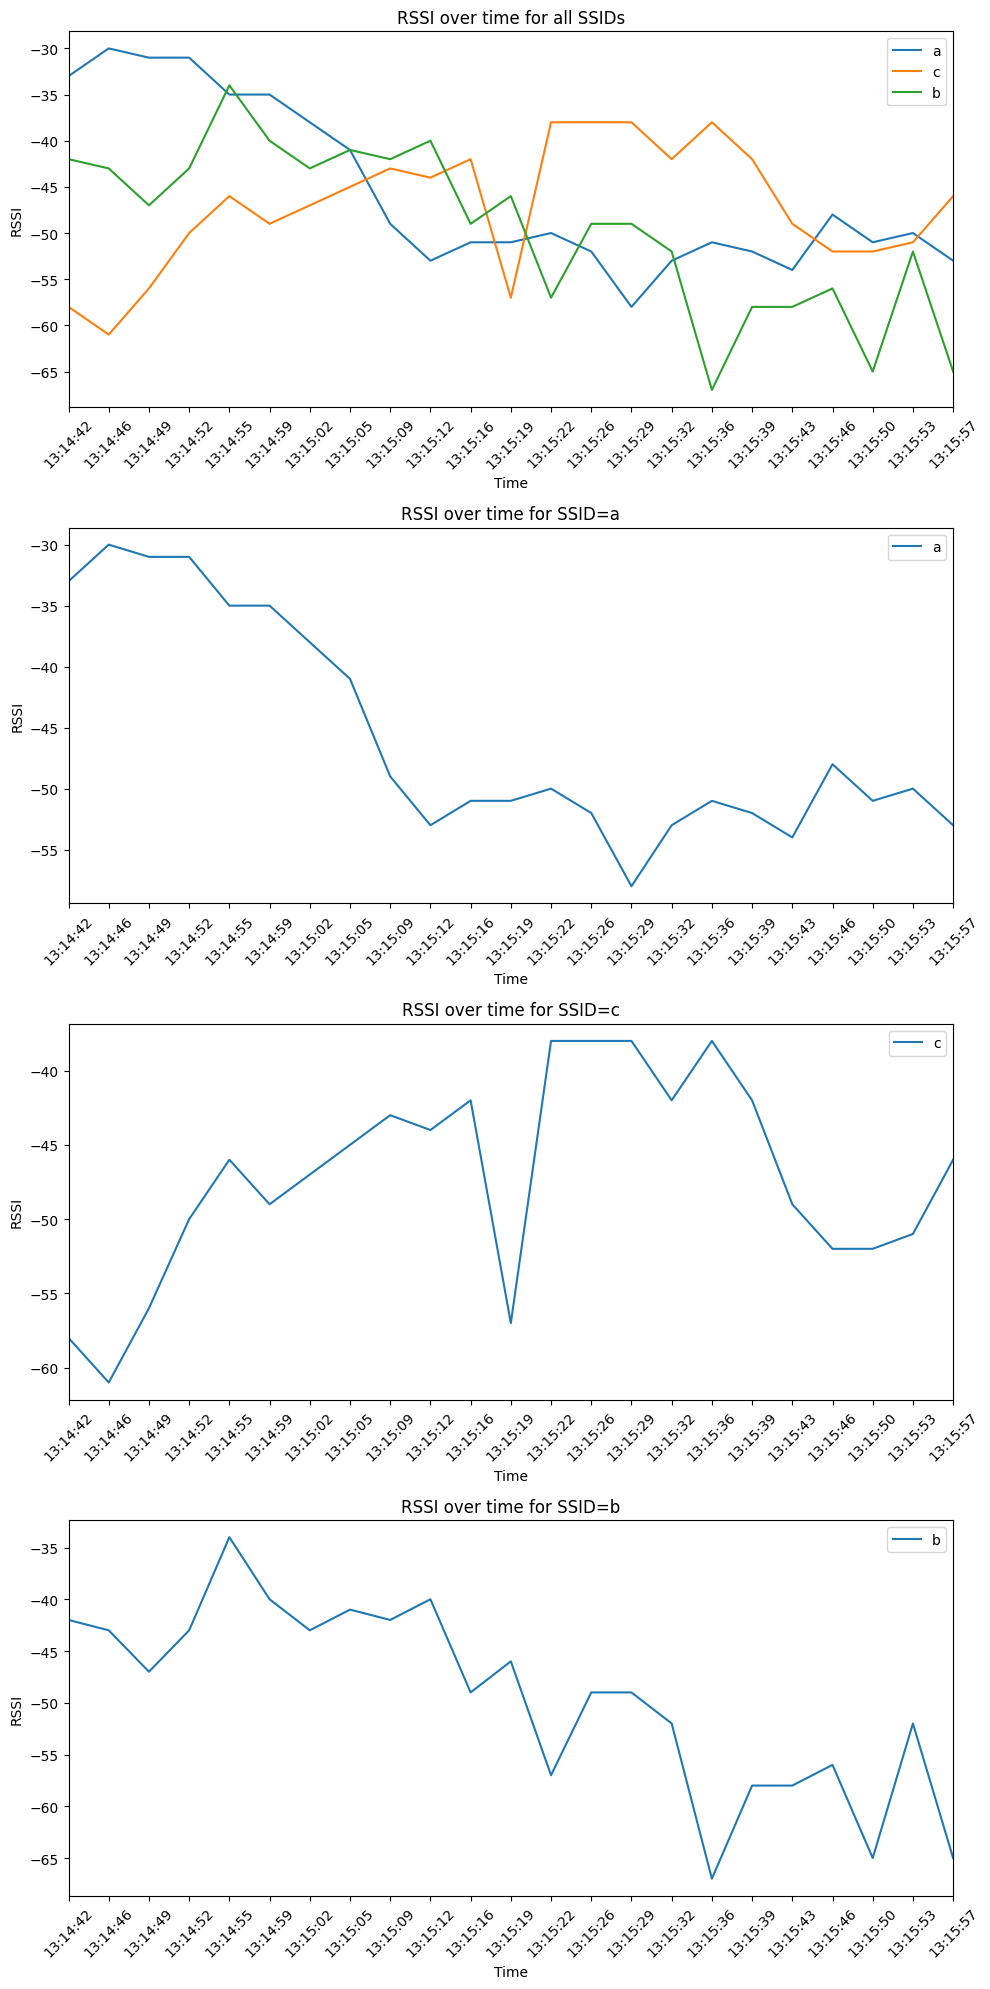

In [6]:
# Exercise 7 code here:
data_path = 'wifi/1-walk-1.csv'

# Read the data
wifi_data = pd.read_csv(data_path)

# Extract unique SSIDs, count how many there are
ssids = wifi_data['SSID'].unique()
# Create len(SSID) subplots for each SSID
fig, axs = plt.subplots(len(ssids)+1, 1, figsize=(10, 5 * (len(ssids)+1)))

# Plot all SSID lines in the same graph
for ssid in ssids:
    ssid_data = wifi_data[wifi_data['SSID'] == ssid]
    axs[0].plot(ssid_data['Time'], ssid_data['RSSI'], label=ssid)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('RSSI')
    axs[0].set_title('RSSI over time for all SSIDs')
    axs[0].legend()
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].autoscale(enable=True, axis='x', tight=True)
# Plot data for each SSID
for i, ssid in enumerate(ssids):
    ssid_data = wifi_data[wifi_data['SSID'] == ssid]
    axs[i+1].plot(ssid_data['Time'], ssid_data['RSSI'], label=ssid)
    axs[i+1].set_xlabel('Time')
    axs[i+1].set_ylabel('RSSI')
    axs[i+1].set_title(f'RSSI over time for SSID={ssid}')
    axs[i+1].legend()
    axs[i+1].tick_params(axis='x', rotation=45)
    axs[i+1].autoscale(enable=True, axis='x', tight=True)

# Adjust layout
plt.tight_layout()
plt.show()

#### Exercise 8
File `wifi/room.png` shows a layout of the room. The locations of the three Wi-Fi access points are annotated on the figure. Think of a possible **straight-line path** of how the user walked in the room. What are the starting and ending coordinates of this straight-line path? Reading your graph from Exercise 7 and eyeballing to give a rough estimate would suffice.

Please enter your answer in the `markdown` cell below:

**Exercise 8 Answer**:
* Starting coordinates are: ( 1 , 3 )
* Ending coordinates are: ( 3 , 3 )

---
## Submission
This Jupyter notebook is the only thing you need to submit to Gradescope. Please make sure that:
* All graphs and results are outputted and readable.
* All short-answer markdown cells are filled in.

---
## Rubric
| Exercise | Rubric                                                    | Points       |
|---------:|:----------------------------------------------------------|-------------:|
| 1        | All 3 accelerometer plots are correct and clearly labeled | $3 \times 2$ |
| 2        | Answer is correct                                         | $3$          |
| 3        | Answer is correct                                         | $1$          |
| 4        | Answer is correct                                         | $1$          |
| 5        | Microphone plot is correct and clearly labeled            | $6$          |
| 6        | Answer is correct                                         | $4$          |
| 7        | Wi-Fi plot is correct and clearly labeled                 | $6$          |
| 8        | Answer is correct                                         | $4$          |